In [32]:
# Change style according to FH
#import matplotlib.pyplot as plt

from plot.plots import * 

# Grundlagen Maschinelles Lernen

## Fundamentals of Machine Learning


Prof. Dr.-Ing. Daniel Böhnke

# Lineare Regression für das Pendel

$$y_{periode} = \beta_0+\beta_1 x_{länge} + \beta_2 x_{masse}$$

* Wir müssen nun $\beta_0$ bis $\beta_2$ bestimmen!
* Methode der kleinsten Quadrate 

$$min(\sum^n_{i=1} (y_i-\beta x_i)^2)$$
* bzw. 
$$min(\sum^n_{i=1} (y_{periode, i} - (\beta_0+\beta_1 x_{länge, i} + \beta_2 x_{masse, i}))^2)$$
* d.h. wir versuchen alle $\beta$ so zu wählen, dass das Residuum $(y-\beta x)^2$ minimal wird  

# Normalen Gleichung der Linearen Ausgleichsrechnung

* Wir können unsere Problemstellung in Matrix Schreibweise ausdrücken!
* Die Residuuen können über die zweite Euklidsche Norm beschrieben werden und wir suchen den $\beta$ Vektor, der diese minimiert
$$||X\beta−Y||^2_2= min_{\beta∈R^n}$$

* Ohne Herleitung können wir in die Normalengleichung überführen
$$X^TX\beta=X^TY$$

* Und nach $\beta$ lösen:

$$\beta= (X^TX)^{−1}X^TY$$





# $R^2$

* $TSS$ ist Varianz aller bekannten Daten. Die Summe der Differenz von Messwert zu MIttelwert

 $$ TSS = \sum_{i=1}^n (y_i-\bar{y})^2$$ 

* $RSS$ ist bereits bekannt:

 $$RSS = \sum_{i=1}^n (y_i-\hat{y}_i)^2$$ 

* Und $R^2$ wird berechnet aus 

$$R^2 = 1 - \frac{RSS}{TSS}$$ 


# Heute 

* In der vergangenen Woche haben Sie Regressionsanalysen durchgeführt. Das *vorhergesagte* $y$ war dabei kontinuierlich. 
* Heute wird die Zuordnung zu Klassen, die Klassifikation, eingeführt. Hierbei ist $y$ diskret.  
* Kann die Lineare Regression dafür eingesetzt werden, bzw. wo ist hier die Grenze? -> Überleitung zur logistischen Regression!
* Und ein weiteres Modell zur Klassifikation wird heute eingeführt: Der  k-Nearest Neighbor (kNN) Ansatz.

# Lernlandkarte 
<center><img src="img/lernlandkarte.png" width=80% class="stretch"></center>

# Einführung Klassifkation

<center><img src="img/vorgehen.png" width=60% class="stretch"></center>

* Für jeden Bullet: **Wie wurde dies für die Regression umgesetzt?**

# Vorhersage Displacement

* Basierend auf dem Gewicht und der Anzahl von Zylindern bestimmen Sie den Hubraum! Wie lauten $X$ und $Y$ für Ihre Fragestellung?

<center><img src="img/skizze_zylinder.png" width=60% class="stretch"></center>

# Vorhersage Triebwerkszustand

* Basierend auf der Drehzahl und der Vibration bestimmen Sie den Zustand des Triebwerks (ok, oder nicht ok)? Wie lauten $X$ und $Y$ für Ihre Fragestellung?

<center><img src="img/skizze_defekt.png" width=60% class="stretch"></center>

# Vorhersage Origin

Basierend auf Leistung und Verbrauch bestimmen Sie den Ursprungskontinent (Origin im Auto Datensatz)? Wie lauten $X$ und $Y$ für Ihre Fragestellung?

<center><img src="img/skizze_origin.png" width=60% class="stretch"></center>

# Skalen

<center><img src="img/skalen.png" width=60% class="stretch"></center>

* Es wird zwischen unterschiedlichen Skalen unterschieden: 
    * **Nominal**: Die Ausprägungen der Skala folgen keiner logischen Reihenfolge
    * **Ordinal**: Es gibt eine Rangfolge zwischen den Ausprägungen, aber die Distanz ist nicht bestimmbar. 
    * **Kardinal oder Metrisch**: Es existiert eine logische Reihenfolge und die Distanz kann bestimmt werden. 

* Können Sie ein Beispiel für jeden Skalentyp nennen?

# Grundformel des Maschinellen Lernens

$$Y = f(X) + \epsilon$$

* $X$ entspricht den Prediktoren (Unabhängigen Variablen, Features, Input).
* $Y$ entspricht der Antwort (Abhängige Variable, Output).
* $\epsilon$ entspricht dem zufälligen Fehlerterm mit Mittelwert $\mu = 0$.
* $f()$ ist die "unbekannte" Funktion zwischen Prediktor und Antwort.
* Später werden wir versuchen ein $\hat{f}()$ zu bestimmen, welches $f()$ so gut wie möglich approximiert. 


# Anwendung auf eine Klassifikation

* $Y$ ist keine kontinuierliche Größe mehr, sondern eine diskrete.
* Wir machen eine **qualitative** und keine quantitative Vorhersage.
* Eine binäre Klassifikation unterscheidet zwischen 2 Klassen ($k=2$).
* Bei Multi-Klassenproblemen unterscheiden wir mehr als 2 Klassen ($k>2$).

# Beispiel Klassifikation Elektromotor

* Wir messen Strom und Spannung für den Betrieb eines Elektromotors.
* Der Motor ist dafür verantwortlich eine Tür zu schließen.
* Für jede Messung ist bekannt, ob ein Lager verschlissen ist oder nicht. 
* Wir sind damit beauftragt defekte Lager zu detektieren, um ein Versagen der Tür zu vermeiden.

In [33]:
n1, n2, dim = 500,500, 2
np.random.seed(0)
C = np.array([[0., -0.23], [0.5, .23]])
X = np.r_[np.dot(np.random.randn(n1, dim), C) + np.array([1, 1]),
          np.dot(np.random.randn(n2, dim), C) + np.array([2, 2])]
y = np.hstack((np.zeros(n1), np.ones(n2)))   
df = pd.DataFrame({'Strom':X[:,0],'Spannung':X[:,1], 'Zustand':y})
df.tail()

,Strom,Spannung,Zustand
995,1.630032,1.521012,1.0
996,1.838271,1.623123,1.0
997,2.048875,1.976982,1.0
998,2.079217,1.714089,1.0
999,1.344515,1.961114,1.0


# Elektro Motor

* Auf dem Plot ist zu erkennen, dass sich Gebiete mit unterschiedlichem Zustand überlappen. 
* Ziel ist es eine Formulierung zu finden, die diese Gebiete so gut wie möglich trennt. 

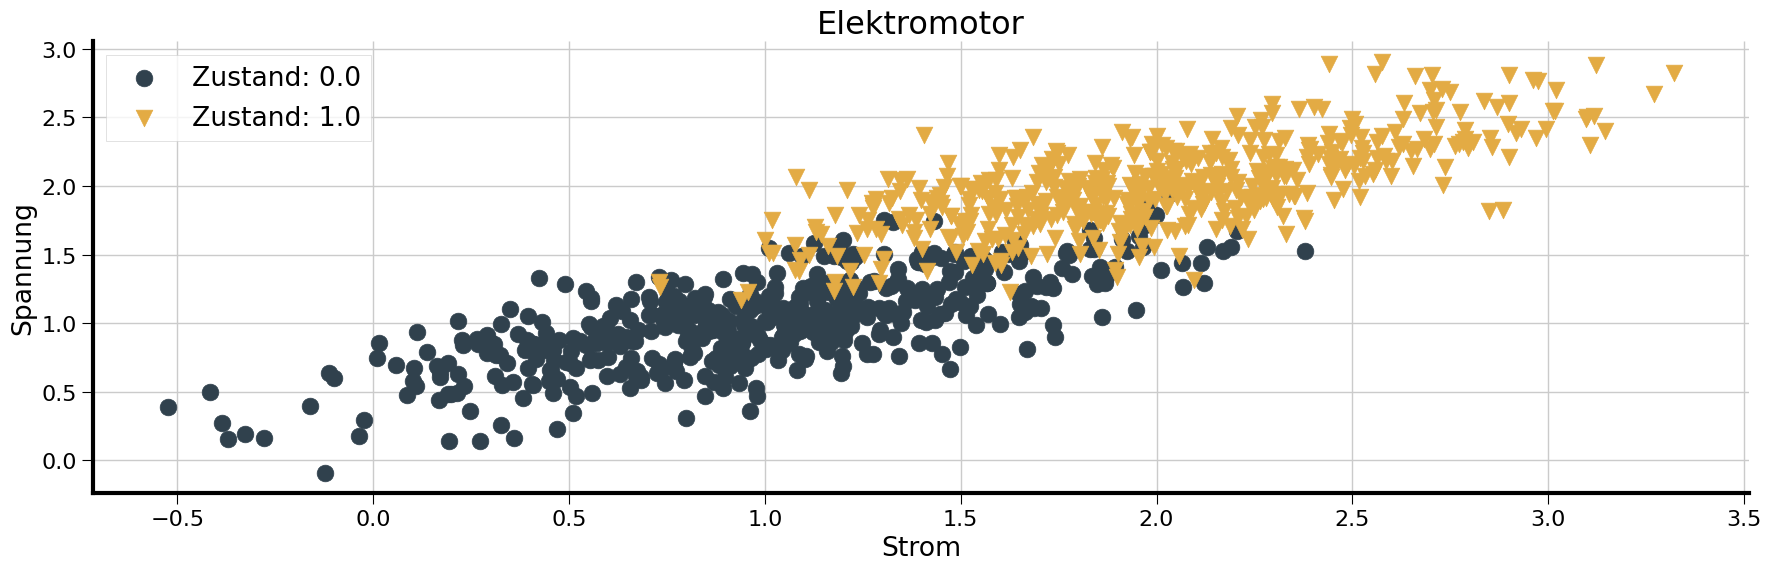

In [34]:
title = {'title':'Elektromotor', 'ylabel': 'Spannung', 'xlabel':'Strom'}
plot_labeled_scatter(df, size=half_plot_size, name_label='Zustand', x_name='Strom', y_name='Spannung', titledic = title)

* Mit Hilfe des Wahrscheinlichkeits-Begriffs wandeln wir das Problem in ein kontinuierliches.
* Wenn die Wahrscheinlichkeit für ein kaputtes Bauteil größer $0.5$ ist, dann klassifizieren wir das Lager als defekt.

# Lineare Regression zur Klassifikation

* Wir kodieren den Zustand des Lagers mit $Y=0$ als iO und $Y=1$ als defekt.
* Vorhersage von $p(Y)$ mittels linearer Regression:

**<center>$P(Y=1|X) = p(X) = \beta_0 + \beta_1X$ </center>**

* Wir beschränken uns zunächst auf den Strom:

In [35]:
# Lineare Regression auf Beispiel Elektromotor anwenden
from sklearn.linear_model import LinearRegression
model_linreg = LinearRegression().fit(df[['Strom']], df['Zustand'])
df['p(x)_linreg'] = model_linreg.predict(df[['Strom']])

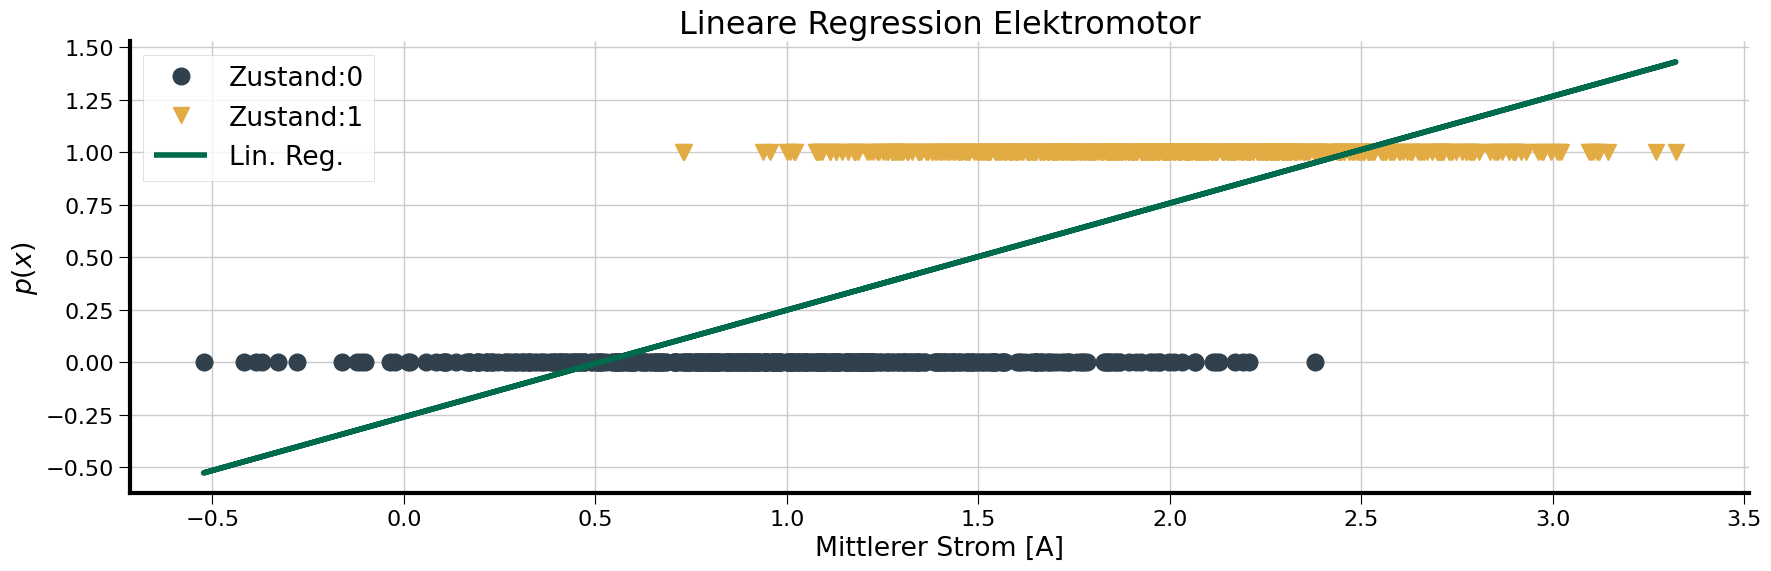

In [36]:
# Plotte Lineare Regression für Elektro Motor
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

ax.plot(df[df['Zustand']==0]['Strom'],df[df['Zustand']==0]['Zustand'], filled_markers[0], label='Zustand:0')
ax.plot(df[df['Zustand']==1]['Strom'],df[df['Zustand']==1]['Zustand'], filled_markers[1], label='Zustand:1')
ax.plot(df['Strom'],df['p(x)_linreg'], c=green, label='Lin. Reg.')

ax.legend()
plt.title('Lineare Regression Elektromotor')
plt.ylabel('$p(x)$')
plt.xlabel('Mittlerer Strom [A]')
plt.tight_layout()


# Probleme der Linearen Regression

* Das 1. Axiom der Wahrscheinlichkeitsrechnung wird verletzt: $p(X) > 1$ und $p(X)<0$
* Es scheint keine sinnvolle Trennung zwischen den beiden Zuständen zu bestehen.

In [37]:
# Wenn die Wahrscheinlichkeit für ein funktionales Lager < 0.5, definieren wir das Lager als ok
df['x_linreg'] = np.where(df['p(x)_linreg']<0.5, 0, 1)

# Wenn der wahre Zustand gleich der Vorhersage ist, wurde eine korrekte Vorhersage getätigt
df['korrekt_linreg'] = np.where(df['x_linreg']==df['Zustand'], 1, 0)
df.head()

,Strom,Spannung,Zustand,p(x)_linreg,x_linreg,korrekt_linreg
0,1.200079,0.686304,0.0,0.349838,0,1
1,2.120447,1.290296,0.0,0.818374,1,0
2,0.511361,0.345688,0.0,-0.000770,0,1
3,0.924321,0.746668,0.0,0.209457,0,1
4,1.205299,1.118178,0.0,0.352496,0,1


# Logistische Funktion (Sigmoid)

<center><img src="img/log_funktion.png" width=40% class="stretch"></center>

* Die logistische oder Sigmoid Funktion kann auf verschiedene Arten notiert werden:

$$\operatorname{sig}(t) = \frac{1}{1 + e^{-t}} = \frac{ e^{t}}{1+ e^{t}}$$

* Sie wird insbesondere auf Grund Ihrer numerischen Eigenschaften geschätzt und häufig in Anwendungsgebieten der maschinellen Lernens angewendet: 
    * Beschränkter Wertebereich
    * Differenzierbar mit durchweg positiv / negativer 1. Ableitung
    * Lediglich ein Wendepunkt

# Ansatz: Logistische Regression

* Bei der logistischen Regression modellieren wir $p(X)$ mit der Logistischen Funktion: 

$$p(X) = \frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}$$

* Unsere Vorhersage berücksichtigt nun das 1. Axiom der Wahrscheinlichkeitsrechnung.

* Umgeformt erhalten wir das Verhältnis der Wahrscheinlichkeiten die **Quote** oder **Chance**:

$$\frac{p(X)}{1-p(X)} = e^{\beta_0+\beta_1 X}$$

* In der Regel betrachtet man in der Statistik lieber den Logarithmus der Quote *log odds*:

$$log\left(\frac{p(X)}{1-p(X)}\right) = \beta_0+\beta_1 X$$


# Training: Maximum Likelihood

<center><img src="img/max_lh.png" width=40% class="stretch"></center>

* Es gibt keine einfache Möglichkeit $\beta_0$ und $\beta_1$ mit Least Squares zu bestimmen.
* Wir versuchen für jede Beobachtung $p(x_i)$ die Vorhersage $\hat{p}(x_i)$ so ähnlich wie möglich zu wählen.
* D.h. wenn der i. Datensatz ein Fehler ist, dann gilt $Y_i=1$,  dann sollte $\hat{p}(x_i) =1$ sein.
* Wenn dieser Gedanke auf alle Datensätze angewendet wird, kommen wir auf die Likelihood Funktion: 

$$l(\beta_0, \beta_1) = \color{Red}{\prod_{i:y_i=1}\hat{p}(x_i) }\color{Orange}{\prod_{i:y_i=0}(1-\hat{p}(x_i))}$$

* Aufgabe eines Lösers ist es nun $\beta_0$ und $\beta_1$ so zu wählen, dass $l(\beta_0, \beta_1)$ maximal wird. 


# Logistische Regression

In [38]:
# Logistische Regression auf Elektro Motor Beispiel anwenden
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression(solver = 'lbfgs').fit(df[['Strom']].values, df['Zustand'].values)
df['p(x)_logreg'] = model_logreg.predict(df[['Strom']].values)

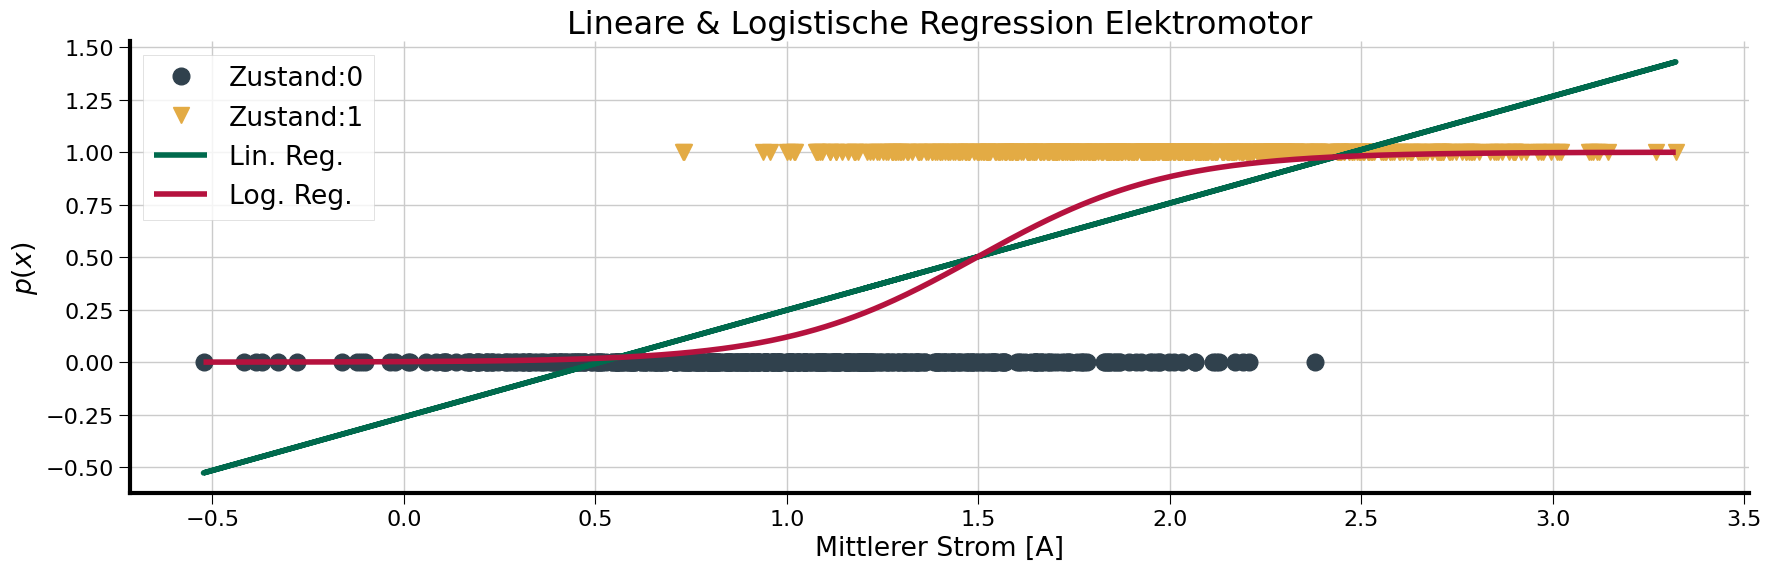

In [39]:
# Plotte Lineare und Logistische Regression für Elektor Motor Beispiel 
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

ax.plot(df[df['Zustand']==0]['Strom'],df[df['Zustand']==0]['Zustand'], filled_markers[0], label='Zustand:0')
ax.plot(df[df['Zustand']==1]['Strom'],df[df['Zustand']==1]['Zustand'], filled_markers[1], label='Zustand:1')
ax.plot(df['Strom'],df['p(x)_linreg'], c=green, label='Lin. Reg.')
x = np.linspace(df['Strom'].min(), df['Strom'].max(), 600)
ax.plot(x,model_logreg.predict_proba(x.reshape(-1, 1))[:,1], c=dark_red, label='Log. Reg.')

ax.legend()
plt.title('Lineare & Logistische Regression Elektromotor')
plt.ylabel('$p(x)$')
plt.xlabel('Mittlerer Strom [A]')
plt.tight_layout()

# Beispiel: Auto Fuel Saver

* Autos mit einer hohen Effizienz ($mpg>30$) werden als **Fuel Saver** klassifiziert.
* Welche Eigenschaften zeichnen Fuel Saver aus?
* Wir verwenden $p=2$ Prediktoren: Horsepower und Weight!

In [40]:
df = pd.read_csv('Auto.csv')
df['horsepower'] = np.where(df['horsepower']=='?', None, df['horsepower'])
df = df.dropna()
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['weight'] = pd.to_numeric(df['weight'])

In [41]:
df['fuel_saver'] = np.where(df['mpg']>30, 1, 0)

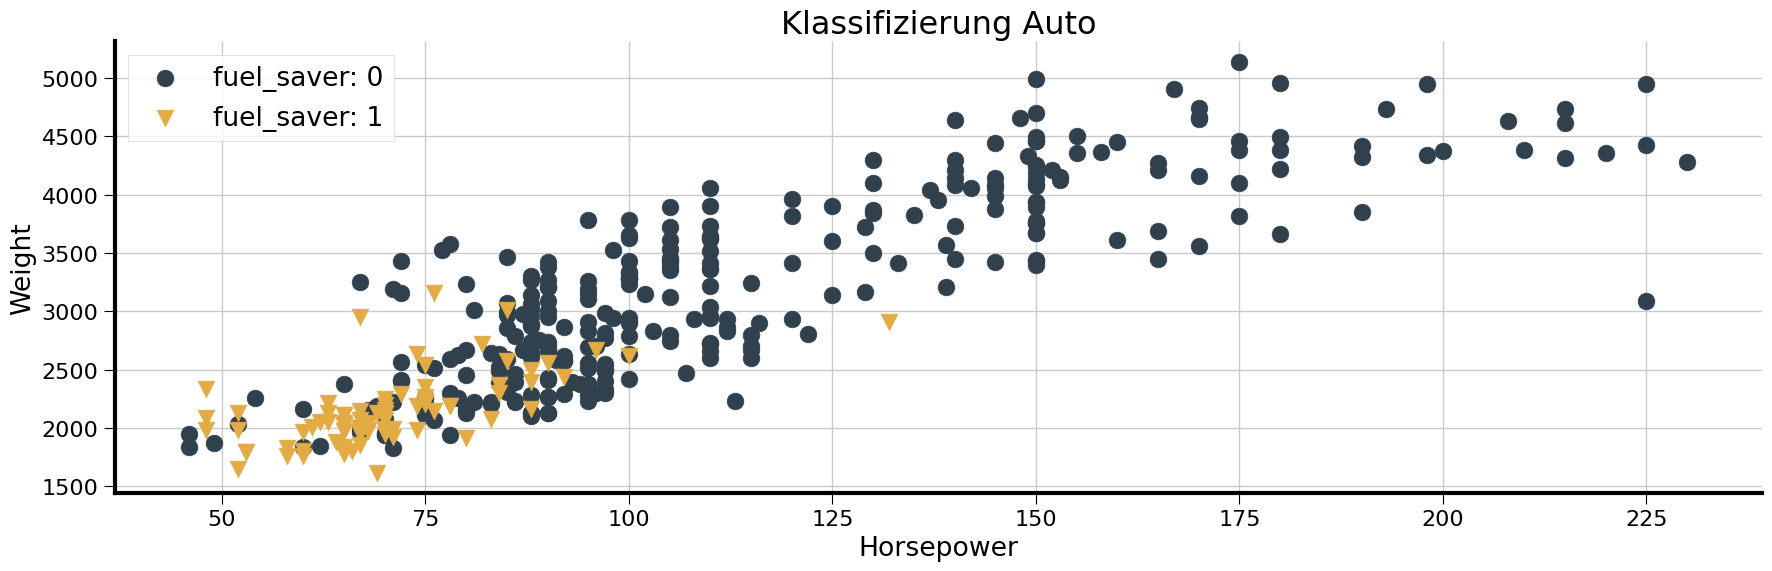

In [42]:
title = {'title':'Klassifizierung Auto', 'ylabel': 'Weight', 'xlabel':'Horsepower'}
plot_labeled_scatter(df, size=half_plot_size, name_label='fuel_saver', x_name='horsepower', y_name='weight', titledic = title)

# Logistische Regression für Fuel Saver

In [43]:
# Wende Logistische Regression auf Auto Problem an
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression(solver='lbfgs').fit(df[['horsepower', 'weight']].values, df['fuel_saver'].values)
df['prediction(fuel_saver)'] = model_logreg.predict(df[['horsepower', 'weight']].values)

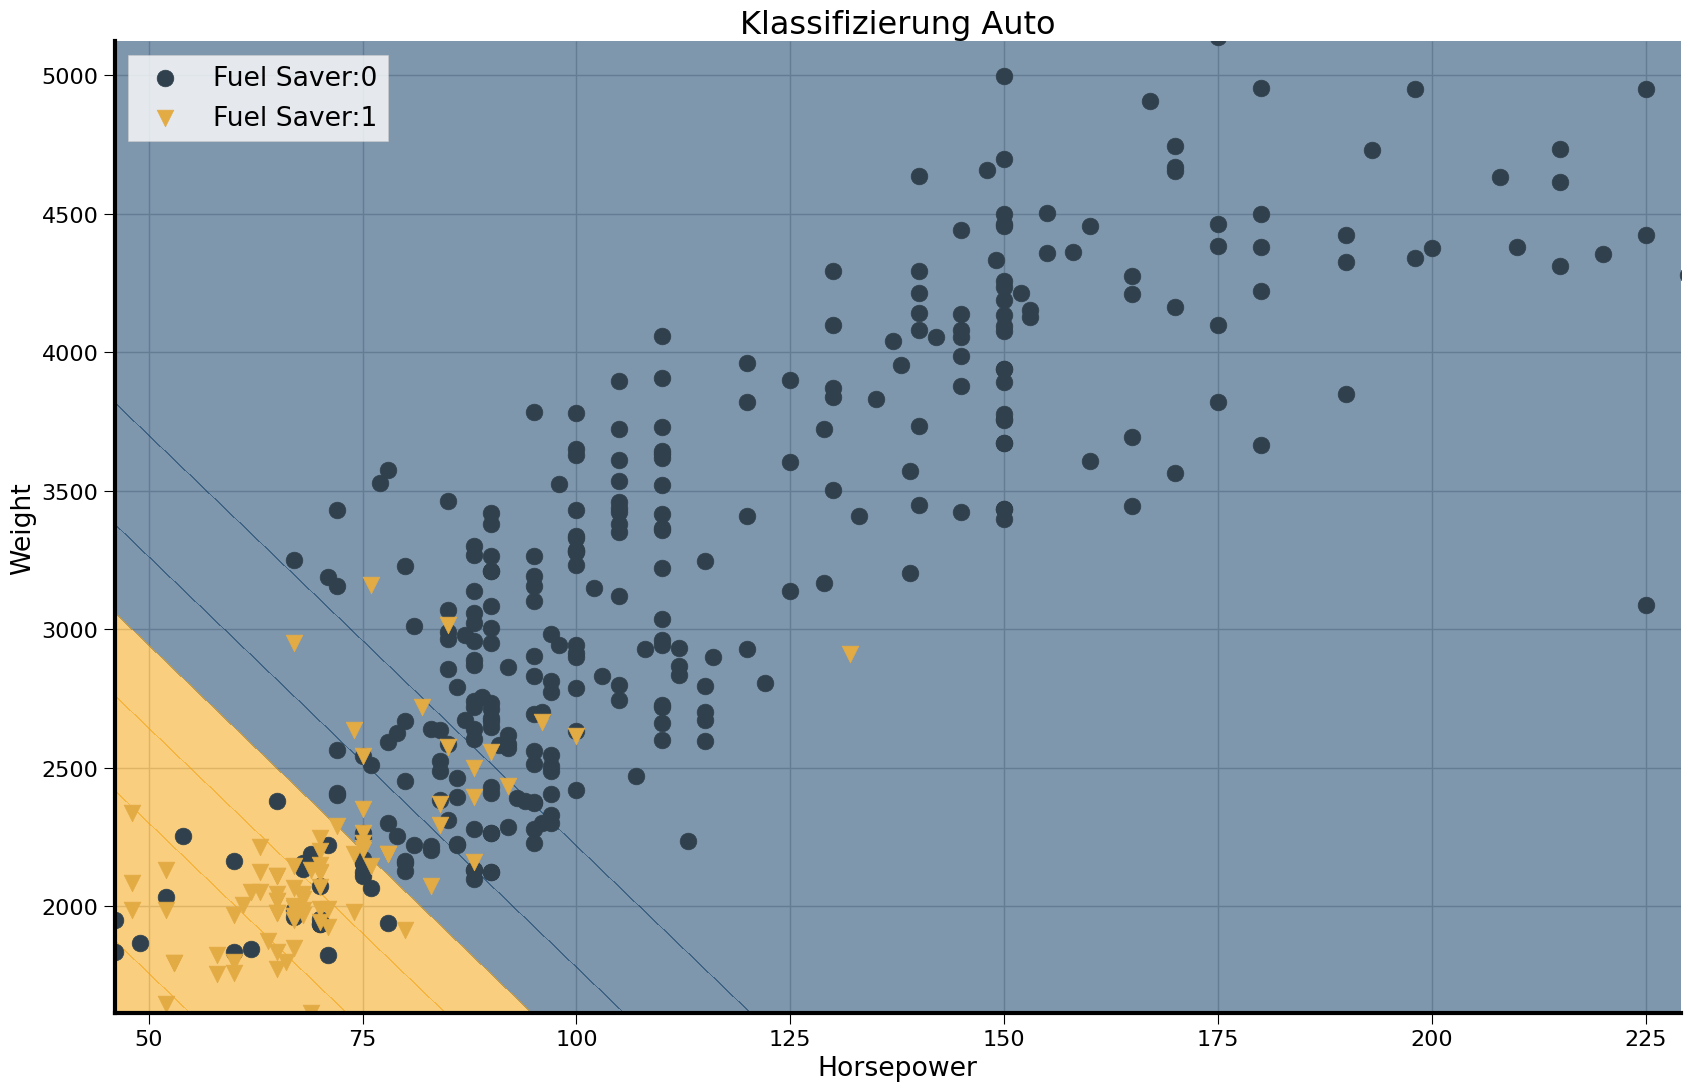

In [44]:
# Plotte die Entscheidungsgrenze
fig, ax = plt.subplots(1, 1, figsize=plot_size)

x_min, x_max = df['horsepower'].min(), df['horsepower'].max()
y_min, y_max = df['weight'].min(), df['weight'].max()
n = 200  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
Z = model_logreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_kiel2, alpha = 0.5)

# Plot also the training points
for i in range(2):
    plt.scatter(df[df['fuel_saver'] == i].horsepower, df[df['fuel_saver'] == i].weight, marker=filled_markers[i], label='Fuel Saver:' + str(i))

plt.title('Klassifizierung Auto')
plt.ylabel('Weight')
plt.xlabel('Horsepower')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
ax.legend();

# Bewerten einer Klassifikation

* Für die Bewertung von Regressionsproblemen haben wir $MSE$ und $R^2$ kennengelernt.
* Sowohl die Residuuen als auch die Varianz sind für kontinuierliche Größen definiert.
* Wir bewerten die Güte einer Klassifikation zunächst mittels der **Accuracy**
    * Die $Accuracy$ ist die einfachste Bewertung einer Klassifikation. 
    * Insbesondere bei nicht gleich-verteilten Klassen (Würfel vs. hoch zuverlässiges Triebwerk)  kommt sie an Ihre Grenzen
    * Hier macht es mehr Sinn mit den tatsächlichen Klassenergebnissen (mehr dazu folgt) zu arbeiten.
$$\text{Accuracy} = \frac{\text{Anzahl korrekter Vorhersagen}}{\text{Anzahl aller Vorhersagen}}$$

* Beispiel: Die Wahrscheinlichkeit, dass eine Pumpe ausfällt liegt bei $10^{-6}$
* Ein *perfekter* Algorithmus sagt alle Ergebnis korrekt  voraus: 

$$\text{Accuracy} = \frac{\text{999999}+\text{1}}{\text{1000000}} = 1$$

* Ein *naiver* Algorithmus sagt dann voraus:
$$\text{Accuracy} = \frac{\text{999999}+\text{0}}{\text{1000000}} = 0.999999 \approx 1$$

# Accuracy Fuel Saver Klassifikation 

In [45]:
df['korrekt'] = np.where(df['prediction(fuel_saver)']==df['fuel_saver'], 1, 0)
df['korrekt'].sum()/len(df)

0.875

In [46]:
print('Es gibt n=%s Autos.' %len(df))
print('Davon sind n=%s Fuel Saver' %len(df[df['fuel_saver']==1]))
print('Und n=%s sind es nicht' %len(df[df['fuel_saver']==0]))

Es gibt n=392 Autos.
Davon sind n=83 Fuel Saver
Und n=309 sind es nicht


In [47]:
# Eine naiver Schätzer sagt immer, dass das Auto kein Fuel Saver ist und erreicht
309/392

0.7882653061224489

# Hypothesenbildung

* Im Falle einer binären Klassifikation suchen wir nach Positiven und Negativen 
    * z.B. Ein Anti-Gen Test wird durchgeführt: Basierend auf dem Ergebnis ist der Patient infiziert (positiv) oder nicht(negativ)
    * z.B. Wir messen die Vibration der Welle: Basierend auf dem Sensorwert ist das Lager defekt (positiv) oder ok (negativ)
* Uns interessiert nun die Korrektheit unserer Modelle
    * Von allen Positiven wie viele haben wir positiv vorhergesagt?
    * Von allen Negativen wie viele haben wir positiv vorhergesagt?
    * etc. 

# Konfusions-Matrix

<center><img src="img/confmatrix.png" width=40% class="stretch"></center>

* True Positive (TP) ist die Anzahl von Datensätzen, die positiv sind und vom Modell positiv bewertet werden. 
    * im Beispiel: alle **defekten** Triebwerke, die auch als **defekt** markiert wurden
* False Positive (FP) ist die Anzahl von Datensätzen, die negativ sind und vom Modell positiv markiert werden. 
    * im Beispiel: alle **nicht-defekten** Triebwerke, die als **defekt** markiert wurden



#  Precision & Recall

* Die **Precision** ist die Accuracy auf positiven Vorhersagen. z.B.: Von allen Infizierten werden $x$% erkannt

$$\text{precision} = \frac{\text{TP}}{\text{TP+FP}}$$

* **Recall** entspricht dem Verhältnis von positiven Datensätzen, die korrekt erkannt wurden. z.B.: von allen positiv Getesteten hatten $x$% die Krankheit.

$$\text{recall} = \frac{\text{TP}}{\text{TP+FN}}$$


# Verteilung der Klassen

* Die Klassen im Autobeispiel sind nicht gleich verteilt.
* Desto ungleichmäßiger die Klassen verteilt sind, desto besser wird die Accuracy des naiven Schätzers.
* z.B. bei der Vorhersage von Maschinenfehlern oder Kreditkartenbetrug ist die Accuracy unbrauchbar.

In [48]:
# Definiere Confusion Matrix Funktion

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Taken from sklearn dokumentation
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#        print("Normalized confusion matrix")
#else:
#        print('Confusion matrix, without normalization')
#    cm = np.linalg.inv(cm)
    cm = np.rot90(cm, 2)

    fig, ax = plt.subplots(figsize=plot_size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Predicted label',
           xlabel='True label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.grid(False)
    plt.show()


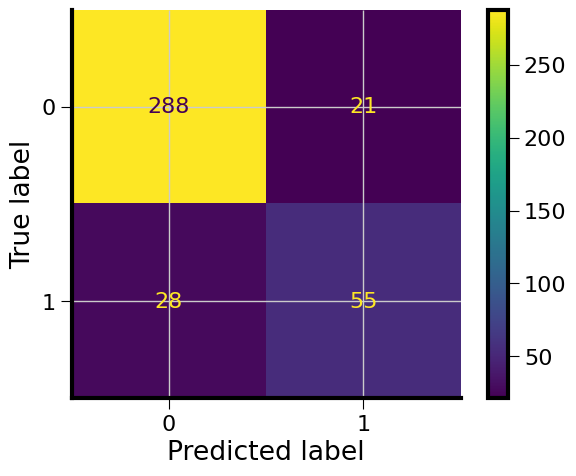

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df[['fuel_saver']].values, df[['prediction(fuel_saver)']], labels=model_logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_logreg.classes_)
disp.plot()

# F1-Score

* Die Accuracy war zwar ungenau, ermöglichte es aber Modelle einfach miteinander zu vergleichen.
* Der F1-Score entspricht dem *harmonischen* Mittelwert von Precision und Recall.
* Das harmonische Mittel gewichtet geringe Werte stärker, d.h. für ein gutes Ergebnis müssen beide Größen *gut* sein.

$$F_1 = \frac{2}{\frac{1}{\text{precision}}+\frac{1}{\text{recall}}}$$

* Wenn keine weiteren Informationen vorhanden sind, ist der F1-Score eine gute Optimierungsgröße
* Im besten Fall sind die Kosten bekannt, die mit TP/FP verbunden sind,  und eine monetäre Bewertung ermöglichen. 


# Score für Fuel Saver

In [50]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(df['fuel_saver'], df['prediction(fuel_saver)'])*100
recall = recall_score(df['fuel_saver'], df['prediction(fuel_saver)'])*100

print('Wenn Fuel Saver erkannt wird, ist es in %.1f%% der Fälle richtig.'%precision)
print('Von allen Fuel Savern werden %.2f%% richtig erkannt.'%recall)

Wenn Fuel Saver erkannt wird, ist es in 72.4% der Fälle richtig.
Von allen Fuel Savern werden 66.27% richtig erkannt.


In [51]:
from sklearn.metrics import f1_score
f1_score(df['fuel_saver'], df['prediction(fuel_saver)']) 

0.6918238993710691

# Steckbrief Logistische Regression
<center><img src="img/steckbrief_logreg.png" width=80% class="stretch"></center>

# Zusammenfassung Bewertung Klassifikation 

<center><img src="img/tafel_bewertung.png" width=60% class="stretch"></center>

# k-Nearest Neighbour

<center><img style="float: right;" src="img/knn.png" width=30% class="stretch"></center>

* Für einen Datensatz $x_0$ suchen wir die zugehörige Klasse
* Wir wählen eine Zahl $N$ und suchen die $N$ Punkte in den Daten, die am nächsten an $x_0$ sind 
* Wir mitteln die Klassengehörigkeit aus den $N$ Punkten

$$p(Y=y_0|X=x_0) = \frac{1}{N}\sum{I(y_i=j)}$$

# k-Nearest Neighbour II

* Bisher treffen wir Annahmen über die Verteilung von Daten. Durch die max. Likelihood schieben wir die Verteilung, so dass unsere Daten dazu passen.
* kNN ist ein nicht-parametrisches Modell: 
    * Wir schätzen in diesem Fall keine statistischen Parameter über unsere Daten 
    * Die Daten werden direkt in unserem Modell verwendet (Es ist unendlich-parametrisch)
* kNN ist *lazy*
    * In diesem Fall findet kein Training statt.
    * Wir wählen $N$ und unser Modell ist fertig.

# Beispiel: k-Nearest Neighbour auf Fuel Saver

In [54]:
from sklearn.neighbors import KNeighborsClassifier
df['fuel_saver'] = np.where(df['mpg']>30, 1, 0)
model_knn_2 = KNeighborsClassifier(n_neighbors=2).fit(df[['horsepower', 'weight']].values, df['fuel_saver'].values)
df['prediction(fuel_saver)'] = model_knn_2.predict(df[['horsepower', 'weight']].values)

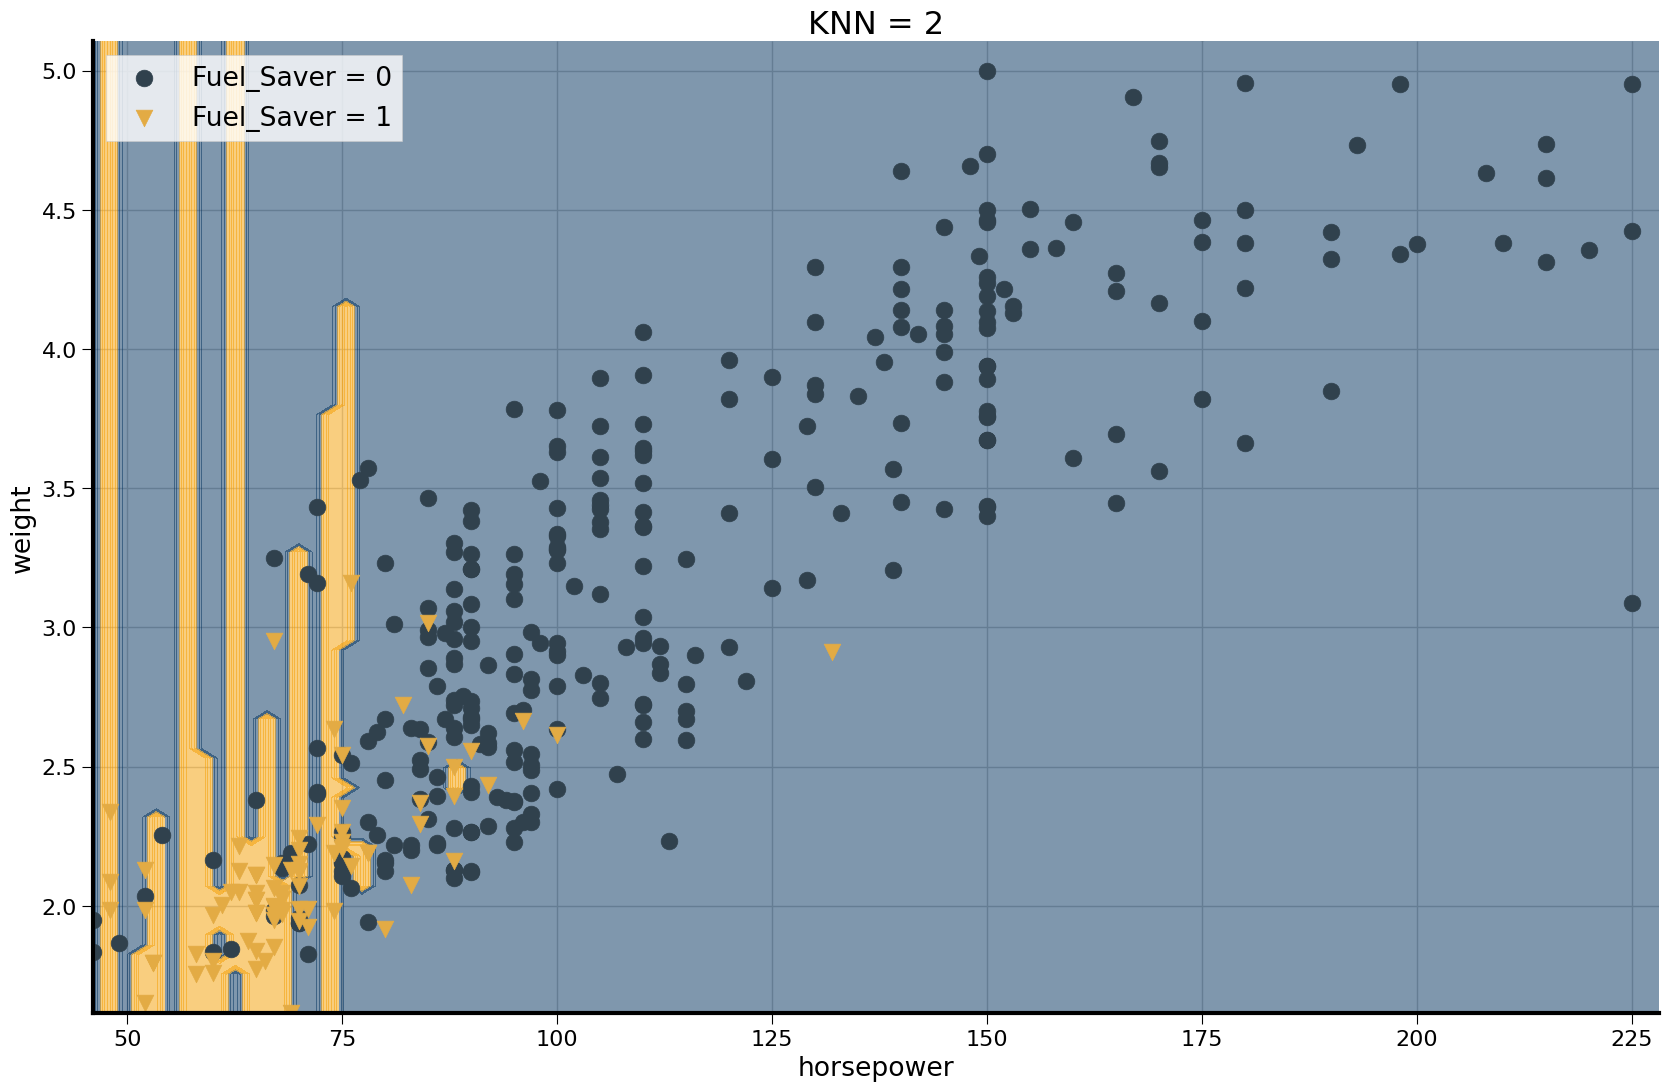

In [55]:
# Plotte die Entscheidungsgrenze

fig, ax = plt.subplots(1, 1, figsize=plot_size)

y_min, y_max = df['weight'].min(), df['weight'].max()
x_min, x_max = df['horsepower'].min(), df['horsepower'].max()
n = 100  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
Z = model_knn_2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.contourf(xx, yy, Z, cmap=cmap_kiel2, alpha = 0.5)

# Plot also the training points
for i in range(2):
    plt.scatter(df[df['fuel_saver'] == i].horsepower, df[df['fuel_saver'] == i].weight, marker=filled_markers[i], label='Fuel_Saver = ' + str(i))

ax.legend()

plt.title('KNN = 2')
plt.ylabel('weight')
plt.xlabel('horsepower')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# Beispiel: k-Nearest Neighbour auf Origin

* Wir trainieren einen kNN, um die Origin vorherzusagen.
* Eingabedaten sind *horsepower* und *MPG*.
* Die Anzahl der Nachbarn wird immer weiter erhöht.

In [23]:
df = pd.read_csv('Auto.csv')
df['horsepower'] = np.where(df['horsepower']=='?', None, df['horsepower'])
df = df.dropna()
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['weight'] = pd.to_numeric(df['weight'])

# kNN mit 2 Nachbarn

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model_knn_2 = KNeighborsClassifier(n_neighbors=2).fit(df[['mpg', 'horsepower']].values, df['origin'].values)
df['prediction(origin)'] = model_knn_2.predict(df[['mpg', 'horsepower']].values)

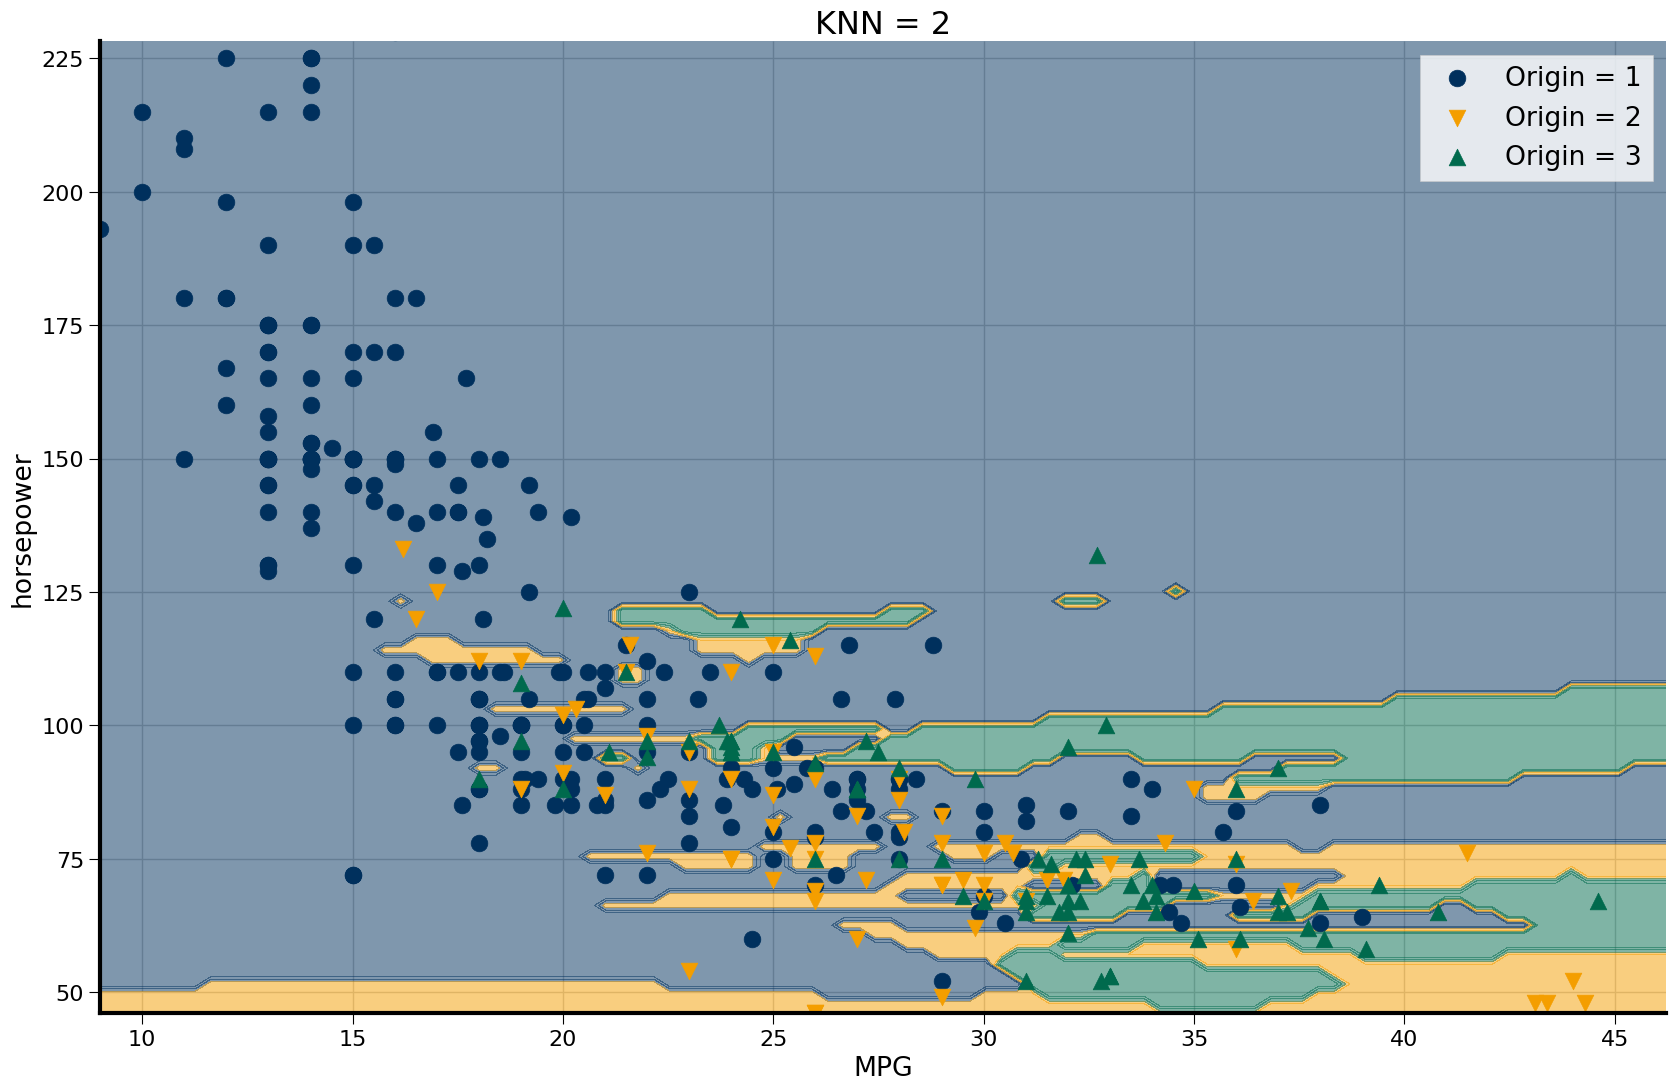

In [25]:
# Plotte die Entscheidungsgrenze

fig, ax = plt.subplots(1, 1, figsize=plot_size)

x_min, x_max = df['mpg'].min(), df['mpg'].max()
y_min, y_max = df['horsepower'].min(), df['horsepower'].max()
n = 100  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
Z = model_knn_2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.contourf(xx, yy, Z, cmap=cmap_kiel, alpha = 0.5)

# Plot also the training points
for i in range(3):
    plt.scatter(df[df['origin'] == i+1].mpg,
                df[df['origin'] == i+1].horsepower,
                marker=filled_markers[i],
                label='Origin = ' + str(i+1),
                c=cmap_kiel.colors[i] )

ax.legend()

plt.title('KNN = 2')
plt.ylabel('horsepower')
plt.xlabel('MPG')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# kNN mit 5 Nachbarn

In [26]:
model_knn_5 = KNeighborsClassifier(n_neighbors=5).fit(df[['mpg', 'horsepower']].values, df['origin'].values)
df['prediction(origin)'] = model_knn_5.predict(df[['mpg', 'horsepower']].values)

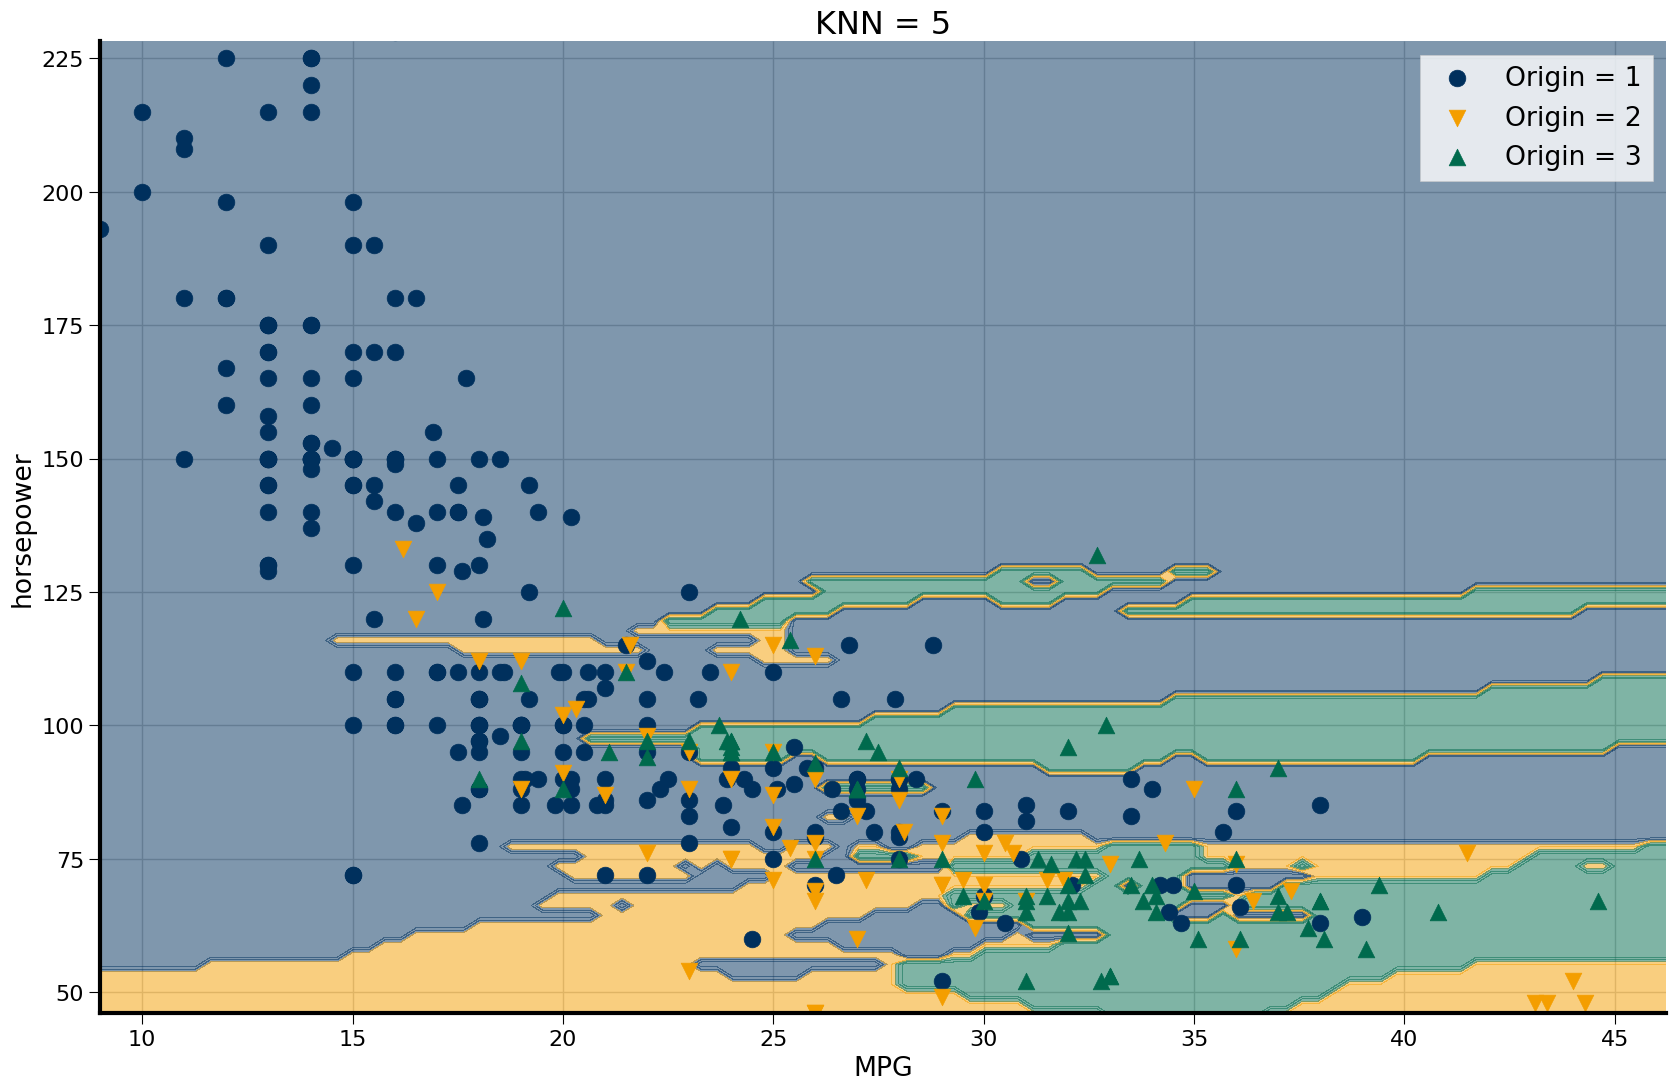

In [27]:
# Plotte die Entscheidungsgrenze

fig, ax = plt.subplots(1, 1, figsize=plot_size)

x_min, x_max = df['mpg'].min(), df['mpg'].max()
y_min, y_max = df['horsepower'].min(), df['horsepower'].max()
n = 100  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
Z = model_knn_5.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.contourf(xx, yy, Z, cmap=cmap_kiel, alpha = 0.5)

# Plot also the training points
for i in range(3):
    plt.scatter(df[df['origin'] == i+1].mpg,
                df[df['origin'] == i+1].horsepower,
                marker=filled_markers[i],
                label='Origin = ' + str(i+1),
                c=cmap_kiel.colors[i] )

ax.legend()

plt.title('KNN = 5')
plt.ylabel('horsepower')
plt.xlabel('MPG')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# kNN mit 10 Nachbarn

In [28]:
model_knn_10 = KNeighborsClassifier(n_neighbors=10).fit(df[['mpg', 'horsepower']].values, df['origin'].values)
df['prediction(origin)'] = model_knn_10.predict(df[['mpg', 'horsepower']].values)

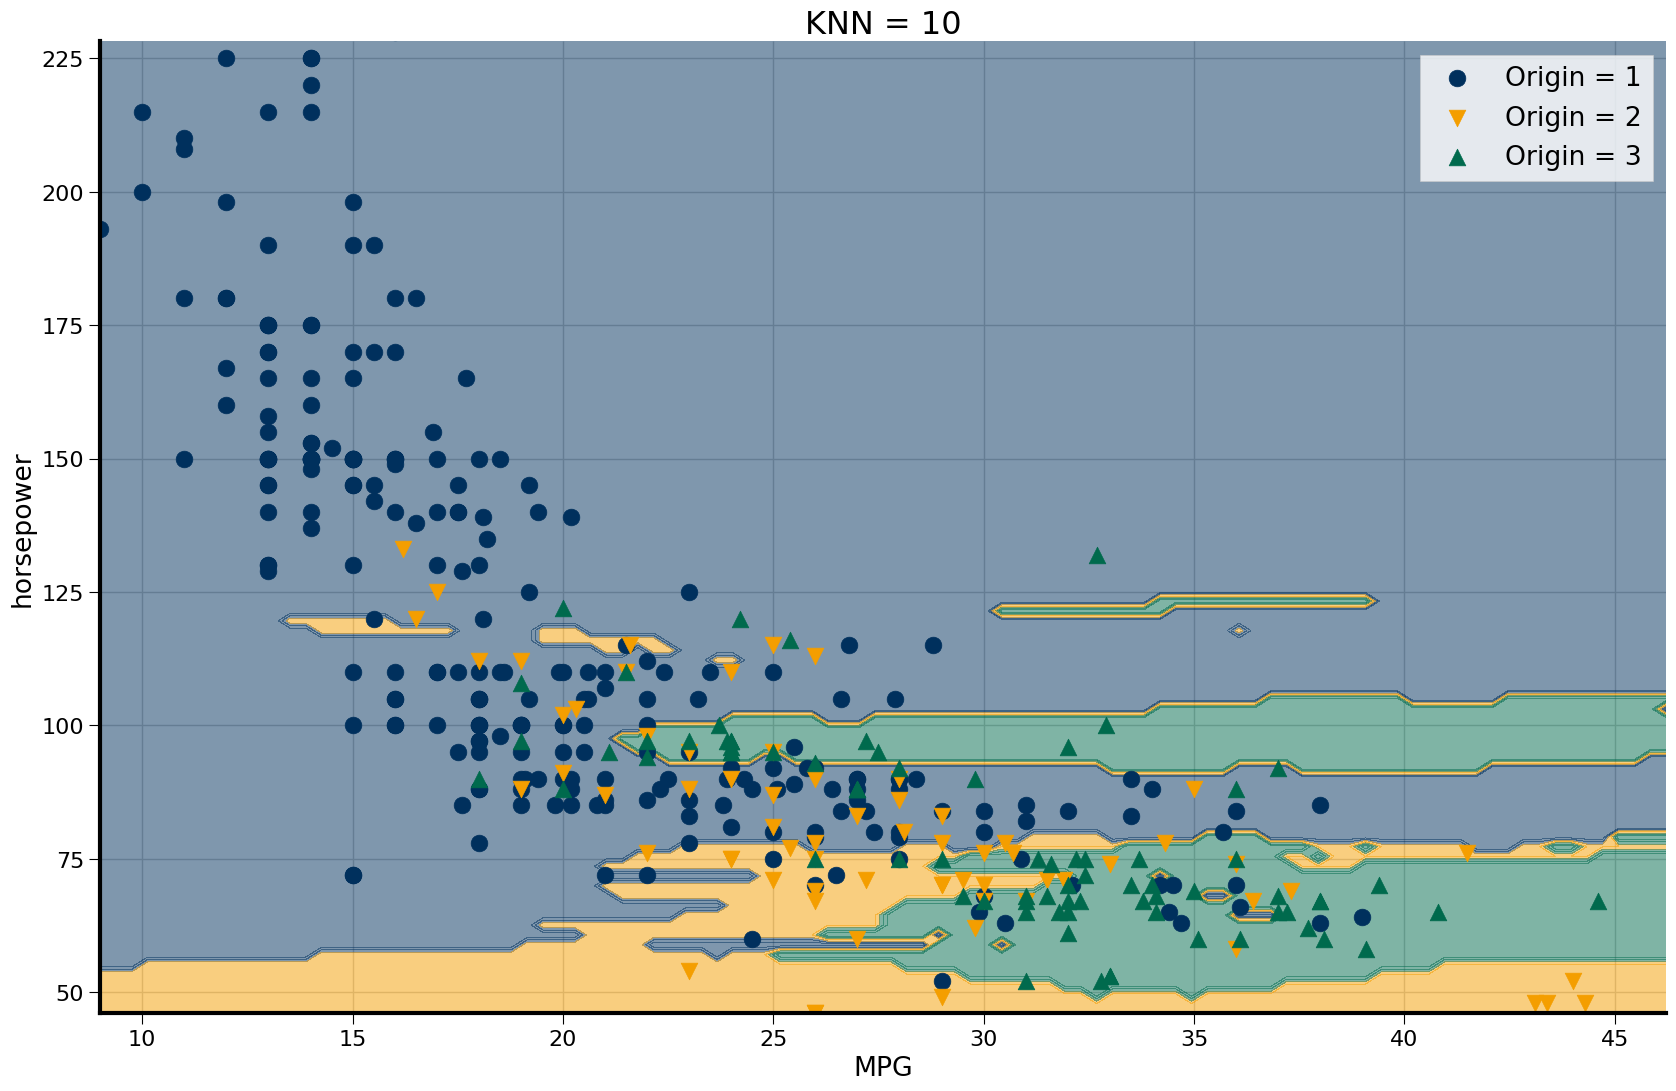

In [29]:
# Plotte die Entscheidungsgrenze

fig, ax = plt.subplots(1, 1, figsize=plot_size)

x_min, x_max = df['mpg'].min(), df['mpg'].max()
y_min, y_max = df['horsepower'].min(), df['horsepower'].max()
n = 100  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
Z = model_knn_10.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.contourf(xx, yy, Z, cmap=cmap_kiel, alpha = 0.5)

# Plot also the training points
for i in range(3):
    plt.scatter(df[df['origin'] == i+1].mpg,
                df[df['origin'] == i+1].horsepower,
                marker=filled_markers[i],
                label='Origin = ' + str(i+1),
                c=cmap_kiel.colors[i] )

ax.legend()

plt.title('KNN = 10')
plt.ylabel('horsepower')
plt.xlabel('MPG')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# k als Hyperparameter 

* Die Anzahl der Nachbarn ist der erste *Hyperparameter*, den Sie kennenlernen.
* Dieser Parameter wird nicht trainiert, sondern von uns gewählt.
* Es macht Sinn diesen Wert zu "optimieren".
* Dafür ist ein Setup mit Test- und Trainingsdaten notwendig, um einen "Overfit" zu vermeiden. (Später)
* Hyperparmeter (von uns gewählt) bitte nicht mit Paramametern (vom Modell trainiert) verwechseln!

In [30]:
from sklearn.metrics import f1_score
scores = []
for i in range(2, 11):
    model_knn = KNeighborsClassifier(n_neighbors=i).fit(df[['mpg', 'horsepower']], df['origin'])
    f1 = f1_score(df['origin'], model_knn.predict(df[['mpg', 'horsepower']]), average='weighted') 
    scores.append(f1)

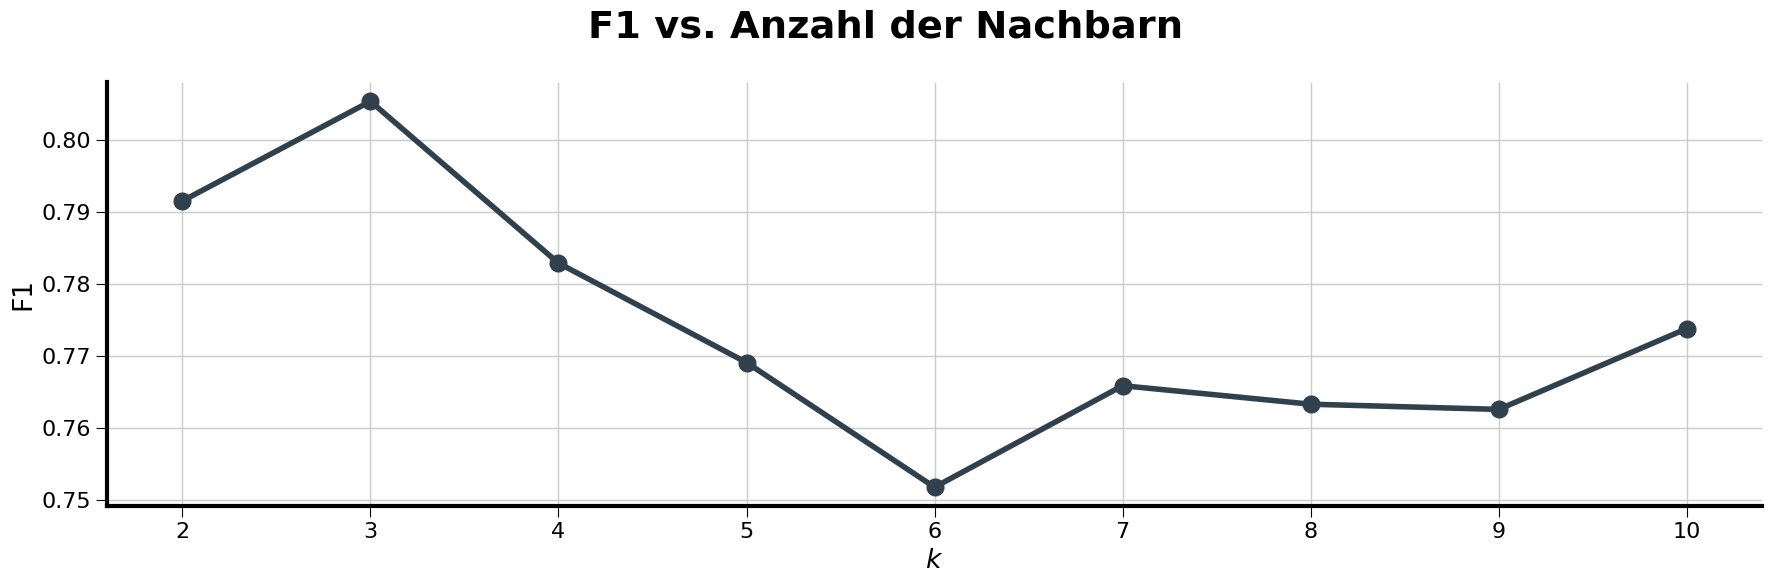

In [31]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

ax.plot(range(2, 11), scores, 'o-')

plt.xlabel('$k$')
plt.ylabel('F1')
plt.suptitle('F1 vs. Anzahl der Nachbarn')
plt.tight_layout();

# Steckbrief KNN
<center><img src="img/steckbrief_knn.png" width=80% class="stretch"></center>

# Parametrische vs. Nicht-Parametrische Modelle

* Parametrische Modelle treffen eine Annahme über die Form von $\hat{f}(x)$
    * Lineare & Logistische Regression: $\beta_0 + \beta_1 X$
* Nicht Parametrische Modelle treffen keine Annahme und orientieren sich unmittelbarer an den Daten
    * Individuelle Datenpunkte beeinflußen das Model
    * Tatsächlich sind die Parameter von der Menge der Daten abhängig -> unendlich-parametrische Modelle

# Klassifikation

<table style='background:white'><tr style='background:white'><td style='background:white'><img src="img/skizze_defekt.png" class="stretch"></td><td style='background:white'><img src="img/skizze_zylinder.png" class="stretch"></td><td style='background:white'><img src="img/skizze_origin.png" class="stretch"></td></tr></table>

* Von den dargestellten Daten: Welche sind nominal, ordinal, metrisch?
* Auf welches dieser Probleme können Sie eine logistische Regression anwenden?
* Auf welches dieser Probleme können Sie einen kNN anwenden?

# Zusammenfassung

* Klassifikation
* Logistische Regression
* k Nearest Neighbours